# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2381 Долотов Никита Андреевич и Зазуля Илья Анатольевич. Вариант №5.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Дискретный единичный скачок** описывается формулой:
$$
\sigma_d(n) = \begin{cases}
0, & n < 0, \\
1, & n \geq 0,
\end{cases}
$$

и соответствует дискретизированной функции Хевисайда $u(t)$.

**Дискретный прямоугольный импульс** определяется как:
$$
s_1(k) = \begin{cases}
U, & n_0 \leqslant k \leqslant n_0 + n_{imp} - 1, \\
0, & else,
\end{cases}
$$

**Линейная комбинация дискретных гармонических колебаний** определяется как:
$$s_2(k)=a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$
где $$x_i(k)=B_i \cdot sin(w_ik), i = 1,2,3.$$

**Дискретный гармонический сигнал** определяется как:
$$s(k) = C \cdot cos(w_o k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

### Расчёт параметров

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Номер бригады
Nb = 5

# Длина последовательности
N = 30 + Nb % 5

# Основание экспоненты
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))

# Амплитуда гармонического сигнала
C = 1 + Nb % 5

# Частота гармонического сигнала
w0 = math.pi / (6 + Nb % 5)

# Амплитуда импульса
U = Nb % 20 + 1

# Начальный момент импульса
n0 = 3 + Nb % 5

# Длина импульса
n_imp = 5 + Nb % 5

# Амплитуды гармонических сигналов
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

# Частоты гармонических сигналов
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)

# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(f'Nb = {Nb}\nN = {N}\na = {a}\nC = {C}\nw0 = {w0}\nU = {U}\nn0 = {n0} \
      \nn_imp = {n_imp}\n\nB1 = {B1}\nB2 = {B2}\nB3 = {B3}\n\nw1 = {w1} \
      \nw2 = {w2}\nw3 = {w3}\n\na1 = {a1}\na2 = {a2}\na3 = {a3}')

Nb = 5
N = 30
a = -0.8250000000000001
C = 1
w0 = 0.5235987755982988
U = 6
n0 = 3       
n_imp = 5

B1 = 1.5
B2 = 5.7
B3 = 2.2

w1 = 0.7853981633974483       
w2 = 0.39269908169872414
w3 = 0.19634954084936207

a1 = 1.5
a2 = 0.7
a3 = 1.4


### Задание 1

Смоделировать дискретный прямоугольный импульс на основе дискретного единичного скачка $\sigma_d(k)$ с выводом графика на интервале времени $n \in [0,N−1]$. \
Пояснить как выполняется моделирование импульса.

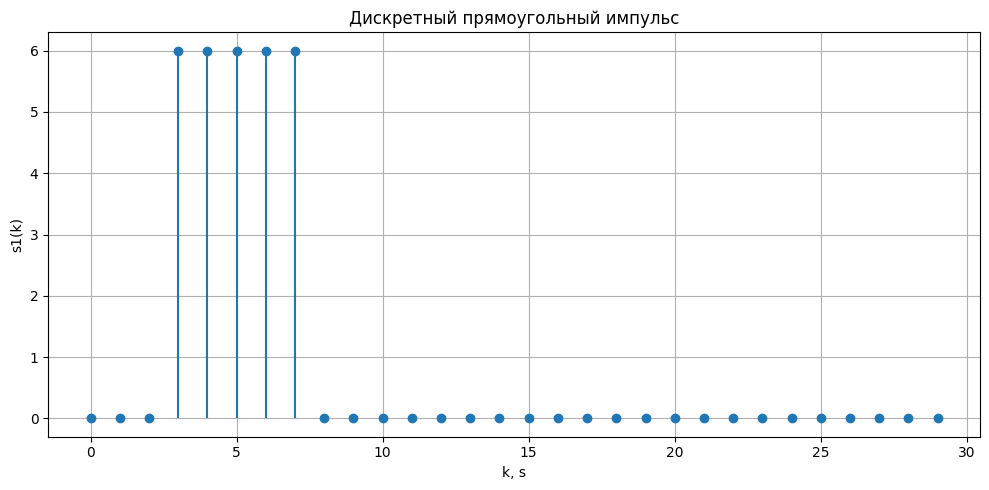

In [33]:
# Функция дискретного прямоугольного импульса
def s1(k):
  if (n0 <= k and k <= n0 + n_imp - 1): return U;
  return 0;

# Генерация интервала времени
n = np.arange(N)

# Вычисление значений функции
Y_s1 = [s1(k) for k in n]

# Построение графиков
plt.figure(figsize=(10, 5))
plt.stem(n, Y_s1, basefmt=" ")
plt.title("Дискретный прямоугольный импульс")
plt.xlabel("k, s")
plt.ylabel("s1(k)")
plt.grid(True)
plt.tight_layout()
plt.show()


Для моделирования дискретного прямоугольного импульса на основе дискретного единичного скачка необходимо собрать импульс, как разность двух скачков сдвинутых во времени:
*   левый край (включение) в момент $n_0: \: \sigma_d(k - n_0)$
*   правый край (выключение) в момент $n_o + n_{imp}: \: \sigma_d(k - (n_0 + n_{imp}))$

Для увеличения амплитуды умножаем на U. Полученная формула: \
$s_1(k)=U \cdot (\sigma_d(k-n_0) - \sigma_d(k - (n_0+n_{imp})))$

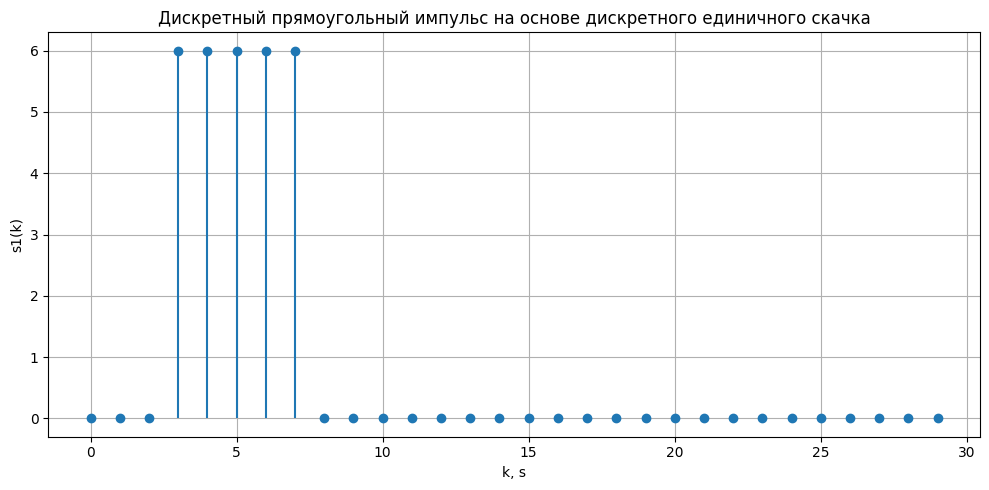

In [35]:
def sigma_d(k):
  return 1 if k >= 0 else 0
# Вычисление значений функции
Y_sigma_d = [U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp))) for k in n]

plt.figure(figsize=(10, 5))
plt.stem(n, Y_sigma_d, basefmt=" ")
plt.title("Дискретный прямоугольный импульс на основе дискретного единичного скачка")
plt.xlabel("k, s")
plt.ylabel("s1(k)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Задание 2
Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$. \
Вывести графики последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени
$n \in [0,5N−1]$. \
Вычислить среднее значение (идентификатор $mean\_s2$), энергию (идентификатор $E$) и среднюю мощность последовательности $s_2(k)$
(идентификатор $P$). \
Пояснить:
1.   операции при моделировании линейной комбинации сигналов $s_2(k)$;
2.   как определяют указанные характеристики.

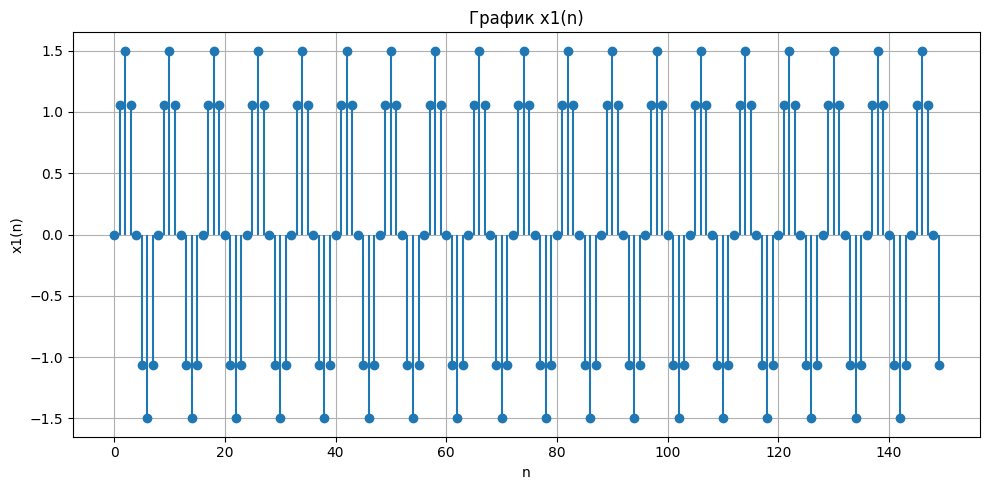

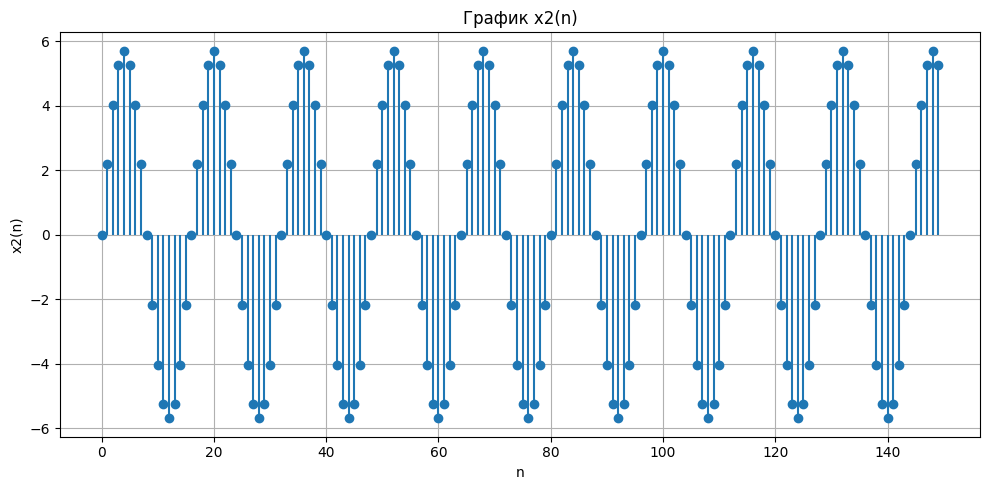

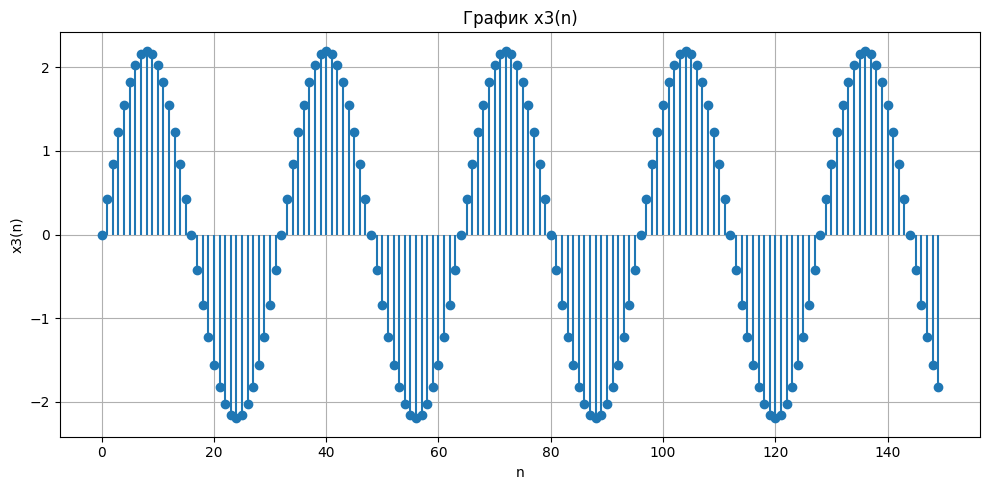

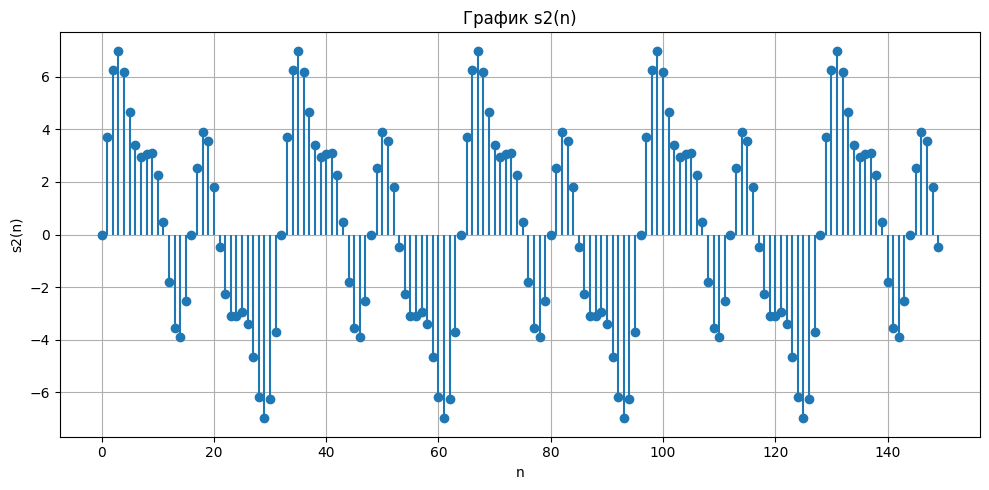

In [36]:
# Генерация интервала времени
n = np.arange(5 * N)

Y_x1 = B1 * np.sin(w1 * n)
Y_x2 = B2 * np.sin(w2 * n)
Y_x3 = B3 * np.sin(w3 * n)
Y_s2 = a1 * Y_x1 + a2 * Y_x2 + a3 * Y_x3

plt.figure(figsize=(10, 5))
plt.stem(n, Y_x1, basefmt=" ")
plt.title("График x1(n)")
plt.xlabel("n")
plt.ylabel("x1(n)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.stem(n, Y_x2, basefmt=" ")
plt.title("График x2(n)")
plt.xlabel("n")
plt.ylabel("x2(n)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.stem(n, Y_x3, basefmt=" ")
plt.title("График x3(n)")
plt.xlabel("n")
plt.ylabel("x3(n)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.stem(n, Y_s2, basefmt=" ")
plt.title("График s2(n)")
plt.xlabel("n")
plt.ylabel("s2(n)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Вычисление характеристик
mean_s2 = np.mean(Y_s2)
E = np.sum(Y_s2**2)
P = E / len(Y_s2)
print(f'mean_s2 = {mean_s2}\nE = {E}\nP = {P}')

mean_s2 = 0.28396041266583466
E = 2231.4741570344095
P = 14.876494380229396


a) Операции при моделировании линейной комбинации сигналов $s_2(k):$

1.   Генерация трех гармонических сигналов $x_1(k), x_2(k), x_3(k),$ соответствующими им амплитудами $B_1, B_2, B_3$ и частотами $w_1, w_2, w_3$;
2.   Умножение каждого сигнала на соответствующим ему коэффициент $a_1, a_2, a_3$;
3.   Сложение сигналов для получения $s_2(k)$, при этом при совпадении знаков значений сигналов происходит усиление результирующего сигнала, а при противоположных знаков - ослабление.

b) Определение указанных характеристик:

*   Среднее значение $mean\_s2 = \cfrac{1}{5N} \cdot \sum_{k=0}^{5N-1} s_2(k)$
*   Энергия $E = \sum_{k=0}^{5N-1} |s_2(k)|^2$
*   Средняя мощность $P = \cfrac{1}{5N} \cdot \sum_{k=0}^{5N-1} |s_2(k)|^2 = \cfrac{E}{5N}$

### Задание 3
Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0,N−1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

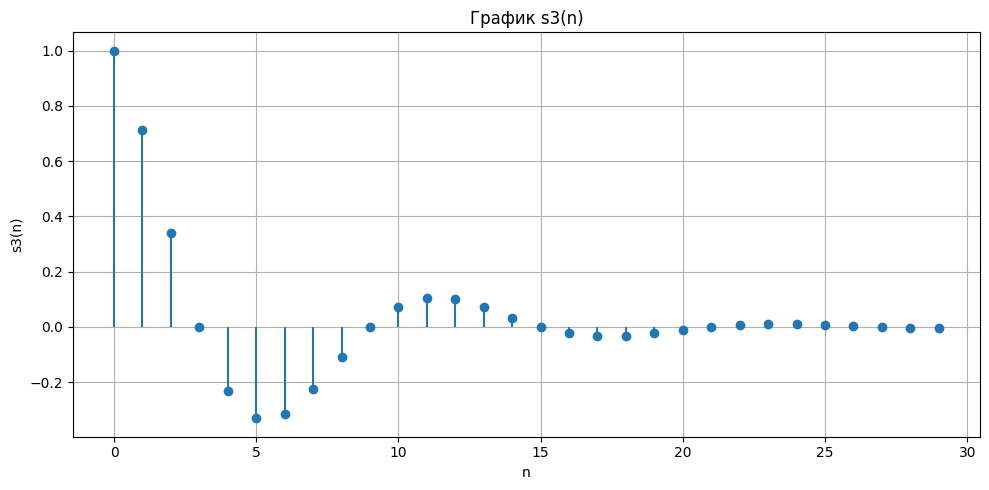

In [39]:
# Генерация интервала времени
n = np.arange(N)

Y_s3 = [abs(a)**k * C * np.cos(w0*k) for k in n]

plt.figure(figsize=(10, 5))
plt.stem(n, Y_s3, basefmt=" ")
plt.title("График s3(n)")
plt.xlabel("n")
plt.ylabel("s3(n)")
plt.grid(True)
plt.tight_layout()
plt.show()

Аналитическая формула дискретного сигнала: $s_3(k) = |a|^k \cdot C \cdot cos(w_0k)$
Операции при моделировании сигнала:

1.   Генерация дискретного гармонического сигнала с амплитудой $C$ и частотой $w_0$;
2.   Умножение гармонического сигнала на экспоненциальную огибающую $|a|^k$, в результате чего изменяется амплитуда и сигнал затухает.


### Задание 4

Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

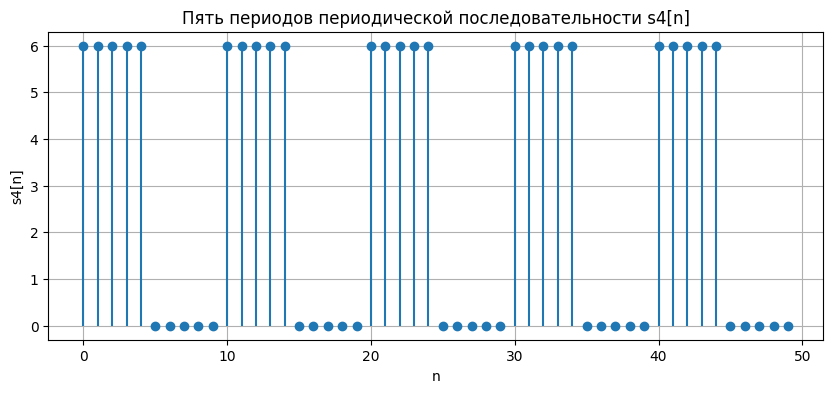

In [42]:
# Удвоенный период
T = 2 * n_imp
periods = 5

n = np.arange(T * periods)

s4 = np.where((n % T) < n_imp, U, 0.0)

plt.figure(figsize=(10, 4))
plt.stem(n, s4, basefmt=" ")
plt.title("Пять периодов периодической последовательности s4[n]")
plt.xlabel("n")
plt.ylabel("s4[n]")
plt.grid(True)
plt.show()

Периодическую последовательность $s_4(k)$ можно определить так:
$$
s_4(k) = \begin{cases}
U, & (n \:\: mod \:\: T) < n_{imp}, \\
0, & else,
\end{cases}
$$

Операции при моделировании периодической последовательности:


1.   Определение периода как $T = 2 \cdot n_{imp}$;
2.   В каждом периоде происходит повторение исходного импульса.




## Выводы

В ходе выполнения лабораторной работы был смоделирован дискретный прямоугольный импульс как разность двух единичных скачков и построен его график на заданном интервале. Далее были сгенерированы три дискретные гармоники, получена их линейная комбинация; выведены графики всех сигналов и вычислены среднее значение, энергия и средняя мощность. Также был построен гармонический сигнал с экспоненциальной огибающей и показано поведение амплитуды во времени и сформирована периодическая последовательность прямоугольных импульсов с периодом, вдвое большим длительности импульса.